# Data 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot  as plt
import seaborn as sns 
import sklearn 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
full_data = pd.read_csv("train.csv")
print("full_data shape is :" , full_data.shape)

full_data shape is : (891, 12)


In [3]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


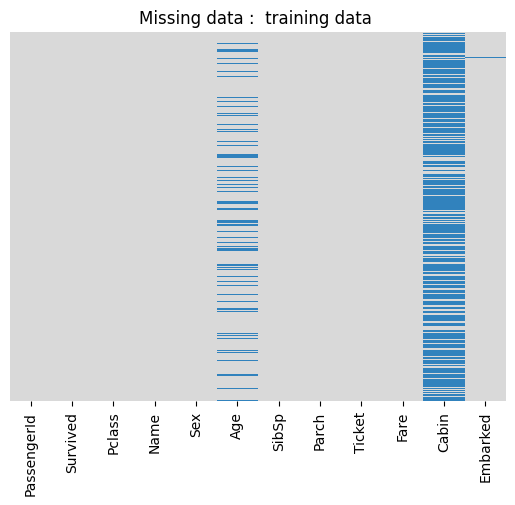

In [5]:
sns.heatmap(full_data.isnull() , yticklabels = False , cbar = False , cmap = "tab20c_r")
plt.title("Missing data :  training data ")
plt.show()

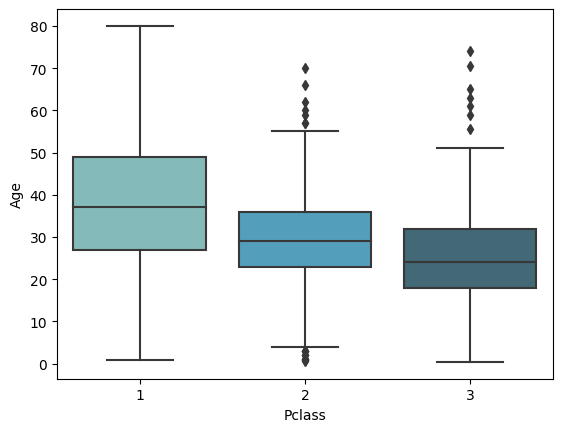

In [6]:

sns.boxplot(x = 'Pclass' , y = 'Age' , data = full_data , palette = "GnBu_d")
plt.show()

In [7]:
# imputation functon 

In [8]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37 
        elif Pclass == 2:
            return 29

        else:
            return 24 

    else:
        return Age 


full_data['Age'] = full_data[['Age' , 'Pclass']].apply(impute_age , axis = 1)   

In [9]:
full_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [10]:
full_data.drop('Cabin' , axis = 1 , inplace = True )


In [11]:
full_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,False,False,False,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False


In [12]:
full_data.dropna(inplace = True)

In [13]:
full_data.drop(['Name' , 'Ticket'] , axis = 1  , inplace = True)

In [14]:
full_data

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,S
887,888,1,1,female,19.0,0,0,30.0000,S
888,889,0,3,female,24.0,1,2,23.4500,S
889,890,1,1,male,26.0,0,0,30.0000,C


In [15]:
object = ['Sex' , 'Embarked']
for colname in object:
    full_data[colname] = full_data[colname].astype('category')

In [16]:
full_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.019314,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,13.209814,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,36.500000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [17]:
full_data.drop('PassengerId' , inplace = True ,axis = 1)

In [18]:
full_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [19]:
full_data.shape

(889, 8)

In [20]:
full_data.select_dtypes(['category']).columns

Index(['Sex', 'Embarked'], dtype='object')

In [21]:
# here start encoding of data of dataset 

In [22]:
# Convert catgorical varaibles into 'Dummy' or indicator varaibles

In [23]:
sex = pd.get_dummies(full_data['Sex']  , drop_first = True ) # drop_first prevent multi_collinearity 
embarked = pd.get_dummies(full_data['Embarked'] , drop_first = True )                     

In [24]:
full_data

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,24.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [25]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [26]:
# Add new dummy coloumns to data Frame 
full_data = pd.concat([full_data , sex , embarked],axis = 1)
full_data.head(5)


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,male,Q,S
0,0,3,male,22.0,1,0,7.2500,S,True,False,True
1,1,1,female,38.0,1,0,71.2833,C,False,False,False
2,1,3,female,26.0,0,0,7.9250,S,False,False,True
3,1,1,female,35.0,1,0,53.1000,S,False,False,True
4,0,3,male,35.0,0,0,8.0500,S,True,False,True


In [27]:
# drop unnecessary columns 
full_data.drop(['Sex' , 'Embarked'] , axis = 1 , inplace = True )

In [28]:
# shape of train data 
print("Shape of train data :" , full_data.shape)

Shape of train data : (889, 9)


In [29]:
full_data.head(5)

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [30]:
# split data to be used by model 
# Create martix of features 
x = full_data.drop('Survived' , axis = 1) # qrabs everything else but "Survived"

In [31]:
# Create target variable 
y = full_data['Survived'] # y is the cloumn we are trying to predict 

In [32]:
# use x and y variables to split data into training and testing set 
from sklearn.model_selection import train_test_split 
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = .20 , random_state = 101)

# Machine Learning

# 1. logistic REGRESSION

In [33]:
# Fit 
# Import model 
from sklearn.linear_model import LogisticRegression 

# Create instance of model 
lreg = LogisticRegression()

# pass the training data into the model 
lreg.fit(x_train , y_train)

LogisticRegression()

In [34]:
y_pred_lreg = lreg.predict(x_test)
print(y_pred_lreg)

[0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1
 0 0 0 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 1 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0
 0 1 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0]


In [35]:
# Score it 
from sklearn.metrics import classification_report , accuracy_score
print("Classfication Model ")
# accuracy 
print('---'*10)
logreg_accuracy = round(accuracy_score(y_test , y_pred_lreg) * 100 , 2)
print('Accuracy ' , logreg_accuracy , '#')

Classfication Model 
------------------------------
Accuracy  82.02 #


Precision :0.85
Recall : 0.66 
--------------------
Confusion matrix : [[99  8]
 [24 47]]
--------------------


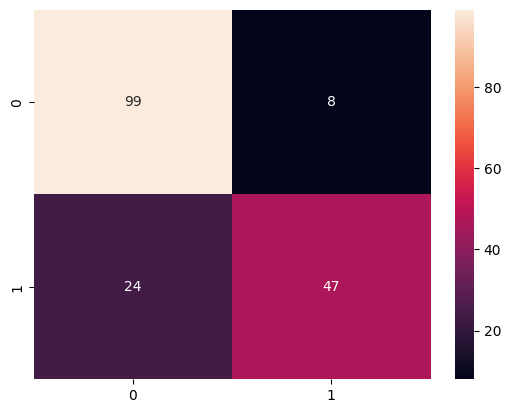

In [36]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix
# calculate recall and precision 
precision = precision_score(y_test , y_pred_lreg)
recall = recall_score(y_test , y_pred_lreg)

# print results 
print(f"Precision :{precision:.2f}")
print(f"Recall : {recall:.2f} ")
print("--"*10)
# calculate confusion matrix 
confusion = confusion_matrix(y_test , y_pred_lreg)
print("Confusion matrix :",confusion)
print("--"*10)
sns.heatmap(confusion , annot = True)
plt.show()

# 2. decision tree classifier 

In [37]:
from sklearn.tree import DecisionTreeClassifier 

print("Decision Tree Classifier ")
print("*---*"*15)
# Create instance 
Dtree  = DecisionTreeClassifier()

# pass the training data 
Dtree.fit(x_train , y_train)

Decision Tree Classifier 
*---**---**---**---**---**---**---**---**---**---**---**---**---**---**---*


DecisionTreeClassifier()

# Model Evaluation
     # Decision Tree Classifier

In [38]:
from sklearn.metrics import accuracy_score 
# prediction from the model 
y_pred_Dtree = Dtree.predict(x_test)

# Score it 
print("Decision Tree Classifier") 

# Accuracy 
print("---"*20)
Dtree_accuracy = round(accuracy_score(y_test , y_pred_Dtree) * 100 , 2)
print("Accuracy " , Dtree_accuracy , '%')

Decision Tree Classifier
------------------------------------------------------------
Accuracy  79.78 %


Precision :0.73
Recall : 0.77 
--------------------
Confusion matrix : [[87 20]
 [16 55]]
--------------------


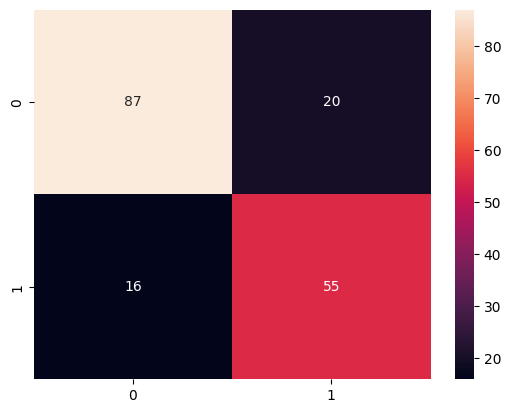

In [39]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix
# calculate recall and precision 
precision = precision_score(y_test , y_pred_Dtree)
recall = recall_score(y_test , y_pred_Dtree)

# print results 
print(f"Precision :{precision:.2f}")
print(f"Recall : {recall:.2f} ")
print("--"*10)
# calculate confusion matrix 
confusion = confusion_matrix(y_test , y_pred_Dtree)
print("Confusion matrix :",confusion)
print("--"*10)
sns.heatmap(confusion , annot = True)
plt.show()

#  3. Random Forest Classifier

# Model Training 

In [40]:
from sklearn.ensemble import RandomForestClassifier 

print("Random Forest Classifier")
# instance Creation 
RFC = RandomForestClassifier()
# Trianing modle 
RFC.fit(x_train , y_train)

Random Forest Classifier


RandomForestClassifier()

# Model Testing 

In [41]:
from sklearn.metrics import accuracy_score 
# prediction 
y_pred_rfc = RFC.predict(x_test)

print("Random Forest Classifier")
# accuracy 
print("*---*"*10)

RFC_Accuracy = round(accuracy_score(y_test , y_pred_rfc) * 100 , 2)
print("Accuracy" , RFC_Accuracy)

Random Forest Classifier
*---**---**---**---**---**---**---**---**---**---*
Accuracy 83.15


Precision :0.81
Recall : 0.76 
--------------------
Confusion matrix : [[94 13]
 [17 54]]
--------------------


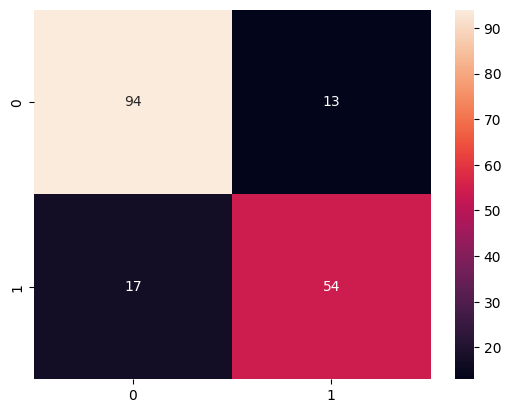

In [42]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix
# calculate recall and precision 
precision = precision_score(y_test , y_pred_rfc)
recall = recall_score(y_test , y_pred_rfc)

# print results 
print(f"Precision :{precision:.2f}")
print(f"Recall : {recall:.2f} ")
print("--"*10)
# calculate confusion matrix 
confusion = confusion_matrix(y_test , y_pred_rfc)
print("Confusion matrix :",confusion)
print("--"*10)
sns.heatmap(confusion , annot = True)
plt.show()

# 4. Gradient boosting Classifier 

# Model Training

In [43]:
from sklearn.ensemble import GradientBoostingClassifier

print("GradientBoostingClassifier")
# Create instance 
GBC = GradientBoostingClassifier()
# train data 
GBC.fit(x_train , y_train)



GradientBoostingClassifier


GradientBoostingClassifier()

# model testing 

In [44]:
from sklearn.metrics import accuracy_score 
# testing Model / prediction 
y_pred_GBC = GBC.predict(x_test)

print("Gradient Boosting Classifier")
print("*--*" *10)
# Accuracy 
GBC_accuracy = round(accuracy_score(y_test , y_pred_GBC) *100 , 2)
print("Accuray" , GBC_accuracy)

Gradient Boosting Classifier
*--**--**--**--**--**--**--**--**--**--*
Accuray 84.27


Precision :0.83
Recall : 0.76 
--------------------
Confusion matrix : [[96 11]
 [17 54]]
--------------------


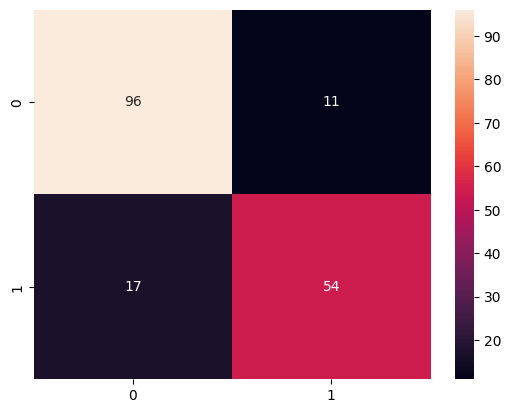

In [45]:
from sklearn.metrics import precision_score , recall_score , confusion_matrix
# calculate recall and precision 
precision = precision_score(y_test , y_pred_GBC)
recall = recall_score(y_test , y_pred_GBC)

# print results 
print(f"Precision :{precision:.2f}")
print(f"Recall : {recall:.2f} ")
print("--"*10)
# calculate confusion matrix 
confusion = confusion_matrix(y_test , y_pred_GBC)
print("Confusion matrix :",confusion)
print("--"*10)
sns.heatmap(confusion , annot = True)
plt.show()

# All Model Scores

In [46]:
model_score = {
    "Logistic Regression Accuracy"            : 82.02 , 
    "Decision Tree Clssifier Accuracy"        :78.65  , 
     "Random Forest Classifier Accuracy"      : 83.15 ,
      "Gradient Boosting Classifier Accuracy" : 84.27      
    
}
sorted_scores = sorted(model_score.items() , key = lambda x: x[1] , reverse = True )

print("Model Ranking (Greater is better ) :") 
for rank , (model_name , score) in enumerate (sorted_scores):
    print(f" {rank} -> , {model_name} , {score} ")

Model Ranking (Greater is better ) :
 0 -> , Gradient Boosting Classifier , 84.27 
 1 -> , Random Forest Classifier , 83.15 
 2 -> , Logistic Regression , 82.02 
 3 -> , Decision Tree Clssifier , 78.65 
